In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/CSV/Bengaluru_Restaurants.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,name,address,addressObj/country,addressObj/postalcode,addressObj/state,cuisine,description,DietaryRestrictions,Dishes,Features,latitude,longitude,localAddress,Meal Type,numberOfReviews,phone,rankingDenominator,rankingPosition,rating,rawRanking
0,"Absolute Barbecues - Marathahalli, Bengaluru","3rd Floor, 90/4, Marathahalli Outer Ring Road ...",India,560037,Karnataka,Indian Barbecue Asian,AB's is India's First WISH GRILL Restaurant.A ...,Vegetarian Friendly Vegan Options Halal Gluten...,Noodle Pasta Cheesecake Crab Salad Curry Quail...,Reservations Seating Parking Available Validat...,12.949864,77.699310,"3rd Floor, 90/4, Marathahalli Outer Ring Road,...",Lunch Dinner,816,+91 73373 36712,5993.0,82.0,4.5,4.194001
1,Cuppa Redefined - HSR,"1237, Sri Sai Crystal 17th Cross 5th Main Rd, ...",India,560102,Karnataka,American Cafe,"""We at cuppa.redefined are always there to loo...",Vegetarian Friendly Vegan Options,Burger,Delivery Takeout Reservations Seating Digital ...,13.007294,77.570076,"1237, Sri Sai Crystal 17th Cross, 5th Main Rd,...",Breakfast Lunch Dinner Brunch Late Night,25,+91 91081 64894,5993.0,231.0,5.0,3.492631
2,Bharjari Oota,"18, Gandhi Bazar Main Road Basavanagudi, Benga...",India,560004,Karnataka,Indian,NaN,Vegetarian Friendly Vegan Options,,Takeout Seating Table Service ...,12.944860,77.572050,"18, Gandhi Bazar Main Road, Basavanagudi, 560004",Breakfast Lunch Dinner,21,+91 98801 41967,5993.0,755.0,4.0,3.153524
3,The Big Barbeque,"No 163, 2nd Floor, Above Adyar Ananda Bhavan N...",India,560100,Karnataka,Italian Chinese Indian Mediterranean Barbecue ...,"Build on the concept of live grill, The best B...",Vegetarian Friendly,Pasta Crab Salad Chili Curry Prawns Octopus Du...,Reservations Seating Table Service ...,12.948556,77.698520,"No 163, 2nd Floor, Above Adyar Ananda Bhavan N...",Lunch Dinner,45,+91 98214 58233,5993.0,222.0,4.5,3.511242
4,Savoury Restaurant,"27 Mosque Road Next to Sangeetha Mobiles, Beng...",India,560005,Karnataka,Indian Asian Middle Eastern Arabic,Born at the turn of the millennium as the pion...,Vegetarian Friendly Halal,Juice & Smoothies Fish Roti,Delivery Takeout Reservations Buffet Private D...,12.999533,77.615850,"27 Mosque Road, Next to Sangeetha Mobiles, 560005",Breakfast Lunch Dinner Brunch,122,+91 94494 42222,5993.0,253.0,4.0,3.455583


In [3]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   9291 non-null   object 
 1   address                9291 non-null   object 
 2   addressObj/country     9291 non-null   object 
 3   addressObj/postalcode  8057 non-null   object 
 4   addressObj/state       9291 non-null   object 
 5   cuisine                9291 non-null   object 
 6   description            897 non-null    object 
 7   DietaryRestrictions    9291 non-null   object 
 8   Dishes                 9291 non-null   object 
 9   Features               9291 non-null   object 
 10  latitude               8962 non-null   float64
 11  longitude              8962 non-null   float64
 12  localAddress           9291 non-null   object 
 13  Meal Type              9291 non-null   object 
 14  numberOfReviews        9291 non-null   int64  
 15  phon

In [4]:
# Check for missing values
df.isnull().sum()

,0
name,0
address,0
addressObj/country,0
addressObj/postalcode,1234
addressObj/state,0
cuisine,0
description,8394
DietaryRestrictions,0
Dishes,0
Features,0


In [5]:
# Drop rows with missing values in critical columns
df = df.dropna(subset=['name', 'address', 'addressObj/country', 'addressObj/state', 'cuisine', 'DietaryRestrictions', 'Dishes', 'Features', 'localAddress', 'Meal Type', 'numberOfReviews'])

# Fill missing values in non-critical columns with a placeholder
df = df.fillna({'description': 'No description', 'phone': 'No phone', 'rankingDenominator': 0, 'rankingPosition': 0, 'rating': 0, 'rawRanking': 0})


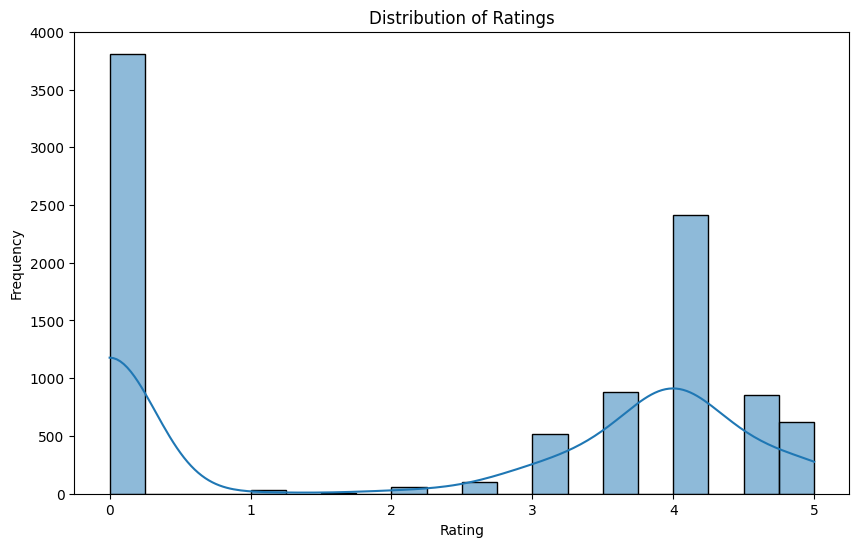

In [6]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

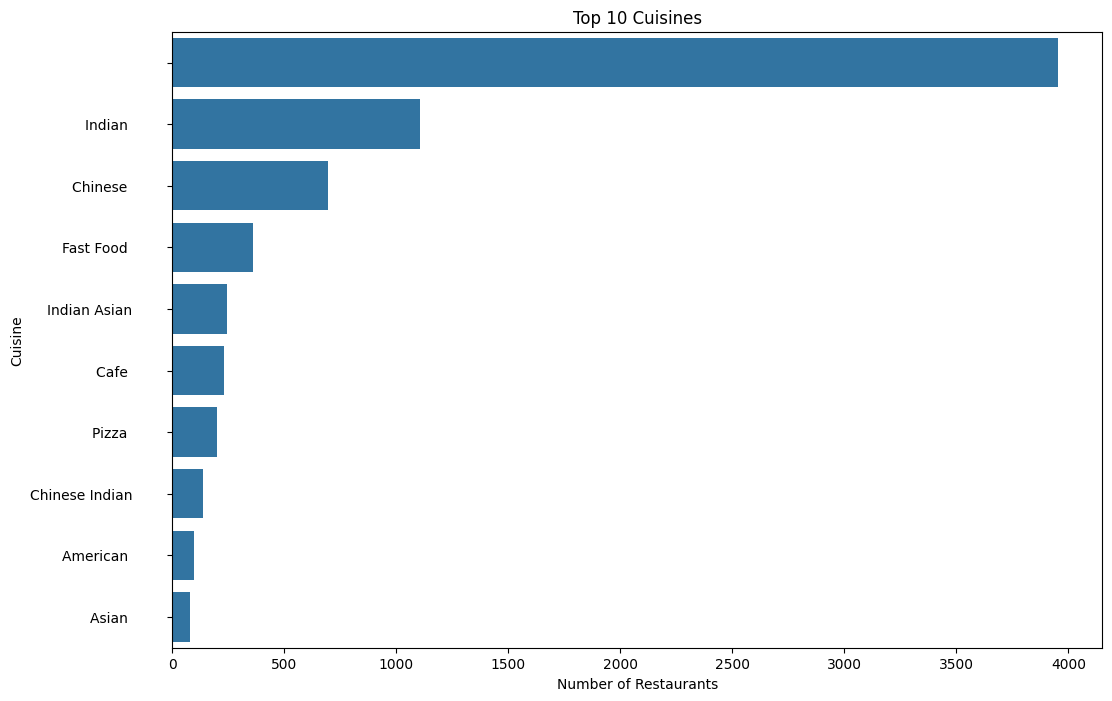

In [7]:
# Top 10 cuisines
plt.figure(figsize=(12, 8))
top_cuisines = df['cuisine'].value_counts().head(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top 10 Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()


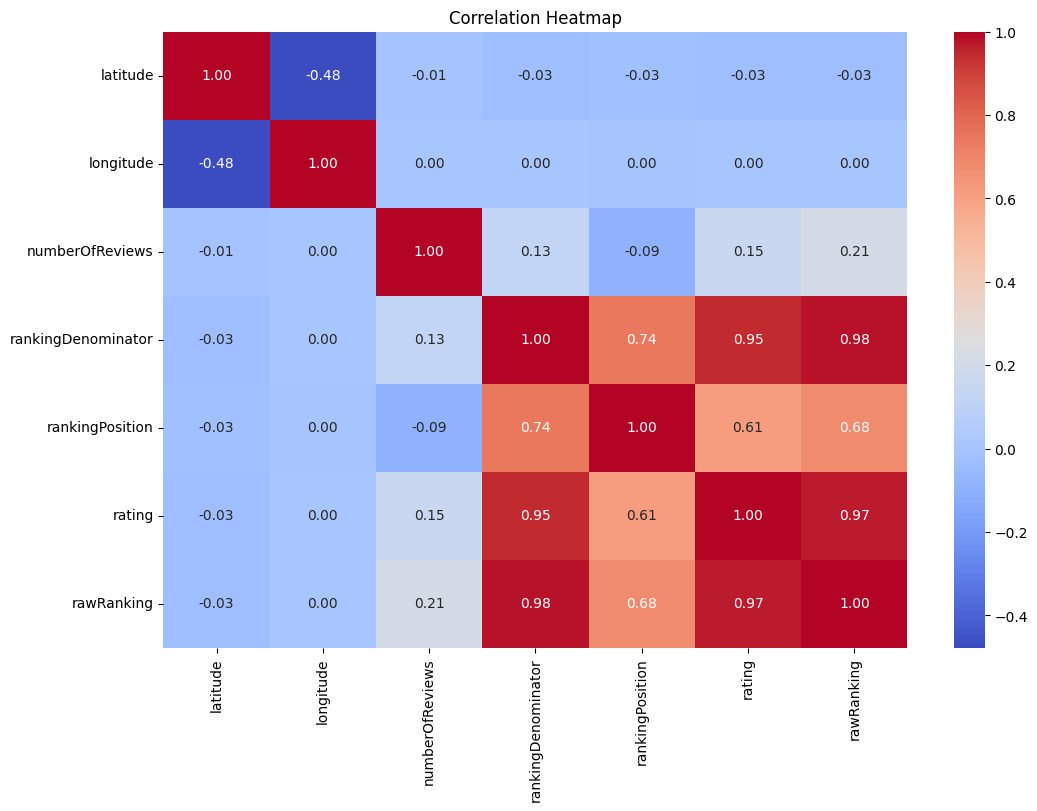

In [8]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
features = ['numberOfReviews', 'rankingDenominator', 'rankingPosition', 'rawRanking']
X = df[features]
y = df['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.2468925817586534, 0.9381198614274802)